<a href="https://colab.research.google.com/github/Tdiddydoit/Python-collab/blob/main/Week10_Assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use the heart attacks dataset to perform logistic regression and predict the values and evaluate the accuracy in which your model has performed.**

Load the necessary libraries

In [25]:
# Code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

Load dataset as a Pandas dataframe

In [5]:
# Code here

df = pd.read_csv('/content/heartattack_data.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Perform Exploratory Data Analysis. You can visualize any features at this point. (Use Groupby/ summary statistics etc)

In [ ]:
# Code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Clean the data where necessary - null values, data types, change in feature names. Save the clean data as a new data frame for further analysis

In [21]:
# Code here
df.fillna(0, inplace=True)
df.sample(8)



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3688,0,43,2.0,1,20.0,0.0,0,0,0,250.0,123.0,74.0,26.01,75.0,90.0,0
3806,0,52,2.0,1,20.0,0.0,0,0,0,410.0,105.0,67.5,27.33,75.0,90.0,0
3554,0,46,1.0,1,7.0,1.0,0,1,0,280.0,202.0,124.0,28.06,66.0,63.0,1
1688,0,40,4.0,1,15.0,0.0,0,0,0,155.0,121.0,86.0,23.16,70.0,59.0,0
1885,1,49,1.0,1,20.0,0.0,0,0,0,222.0,124.0,86.0,27.25,80.0,0.0,0
1336,0,39,2.0,0,0.0,0.0,0,0,0,201.0,151.0,94.0,31.48,80.0,74.0,0
328,0,59,1.0,0,0.0,0.0,0,1,0,246.0,189.0,111.0,19.88,90.0,85.0,1
2471,1,52,2.0,0,0.0,0.0,1,0,0,202.0,136.0,94.0,29.93,83.0,67.0,1


Apply Logistic Regression model and fit the data  

(If needed, you will have to transform categorical data into dummy variables)


In [22]:
# Code here
X = df.drop(columns=  ['totChol'])
y = df['totChol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Show performance metrics - Determining the Accuracy on which the model has performed ROC, AUC

In [23]:
# Code here

y_pred = model.predict(X_test)
y_pred


array([252.00914969, 235.44694006, 237.40382258, 237.49479633,
       233.45743607, 239.55528021, 232.82396524, 252.5401652 ,
       242.66166607, 261.0810923 , 238.6561569 , 252.85456703,
       217.16787304, 243.90080509, 248.22886644, 217.6447671 ,
       240.60550995, 239.62260595, 241.61766808, 246.80452396,
       255.50355602, 222.376422  , 241.15838711, 202.03444857,
       236.91789998, 258.30547261, 224.05866539, 225.80604171,
       233.53783958, 231.77406837, 249.62642908, 215.42971158,
       231.92312083, 236.76321357, 217.02636884, 217.37901089,
       222.33972537, 221.44964979, 239.12903926, 227.89059694,
       268.32096944, 246.10943373, 252.12433119, 217.10997658,
       227.31597161, 220.00251785, 235.59510809, 212.1578788 ,
       218.35592338, 262.41181907, 221.20986641, 241.21407563,
       241.37231206, 224.81115163, 207.33807123, 244.51147777,
       246.41708623, 243.41205218, 224.23556407, 221.75902868,
       230.35738161, 245.82053618, 238.3621911 , 230.61

In [24]:
y_test

,totChol
3188,190.0
764,162.0
3264,261.0
1967,250.0
2185,250.0
...,...
3303,259.0
4056,254.0
4210,282.0
3971,195.0


In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

2312.8697117814627

In [27]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.048012349731191506

Show a correlation matrix between actual values vs predicted values ans explain your insights

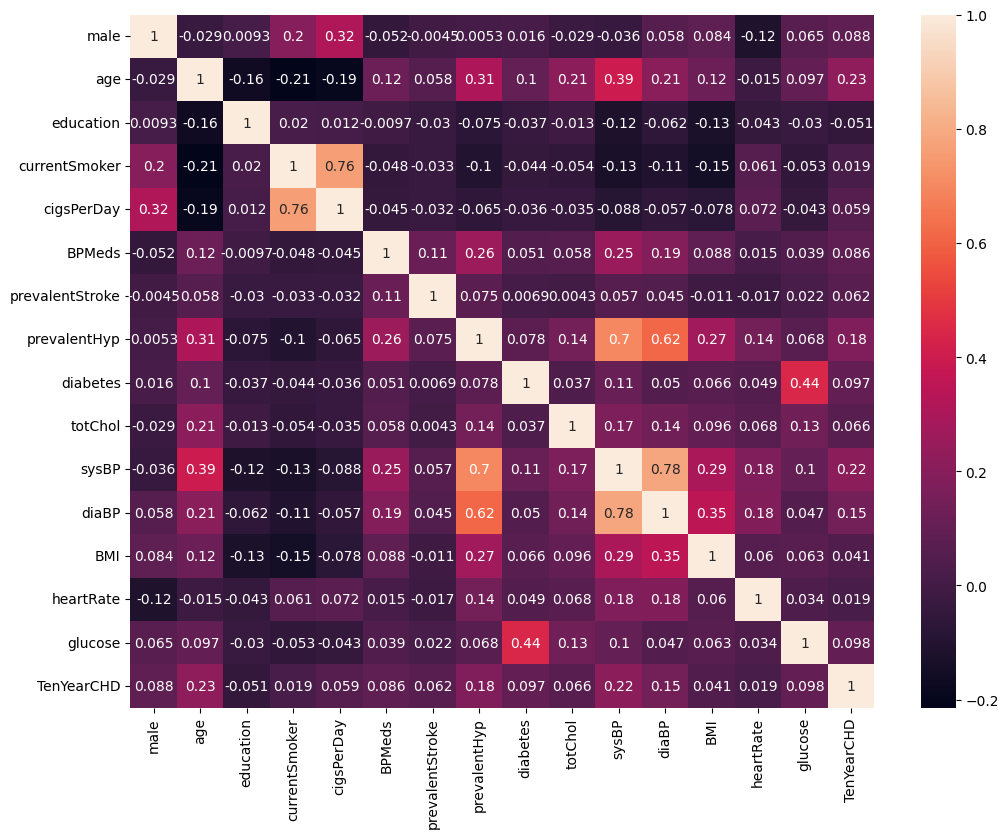

In [30]:
# Code here
plt.figure(figsize=(12,9))

sns.heatmap(df.corr(), annot=True)

plt.show()

The Cholesteral and heart futures like BMI are pretty closley related

You can also use 1 independent feature and the target to show the fit of data in a sigmoid curve through visualization

In [ ]:
# Code here

**Note**:

Explain your insights at every step, what you interpret from the visualizations or at the end and conclude the outputs that show up after running your code.